<a href="https://colab.research.google.com/github/AbdulAlim8660/Data_Science_projects/blob/master/Predictive_maintenance_with_Explainable_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 5.1 MB/s 
     |████████████████████████████████| 199 kB 59.5 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 2.0 MB/s 


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.0 MB/s 


In [ ]:
!pip install imbalanced_ensemble

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 268 kB 4.8 MB/s 
     |████████████████████████████████| 11.2 MB 43.9 MB/s 
     |████████████████████████████████| 957 kB 47.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are i

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importing the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import catboost
from catboost import CatBoostClassifier
import shap
from sklearn.model_selection import GridSearchCV
from imblearn.ensemble import RUSBoostClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
from imbalanced_ensemble.ensemble import SMOTEBoostClassifier

# Loading and Analysing the dataset

In [ ]:
#Loading the dataset into a dataframe
df = pd.read_csv('ai4i2020.csv')

In [ ]:
#checking the top5 records of the dataset to have an idea about the columns and its values
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [ ]:
#describing the dataset in order to get an idea about the values
df.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000         0.000000   
25%               1423.000000     33.200000        53.000000         0.000000   
50%               1503.000000     40.100000       108.000000         0.000000   
75%               1612.000000     46.800000       162.000000         0.000000   
max               2886.000000     76.600000       253.000000         1.000000   

                TWF           HDF           PWF           OSF          RNF  
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.00000  
mean       0.004600      0.011500      0.009500      0.009800      0.00190  
std        0.067671      0.106625      0.097009      0.098514      0.04355  
min        0.000000      0.000000      0.000000      0.000000      0.00000  
25%        0.000000      0.000000      0.000000      0.000000      0.00000  
50%        0.000000      0.000000      0.000000      0.000000      0.00000  
75%        0.000000      0.000000      0.000000      0.000000      0.00000  
max        1.000000      1.000000      1.000000      1.000000      1.00000

In [ ]:
#to find the information about the datatypes of the columns and to see if it has any null values
print(df.shape)
print(df.info())

(10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(

We dont have any null values in the dataset and its clean with the correct datatypes as well

In [ ]:
# renaming the columns for better analysis
df.rename(columns={'Air temperature [K]':'Air temperature','Process temperature [K]':'Process temperature','Rotational speed [rpm]':'Rotational speed','Torque [Nm]':'Torque','Tool wear [min]':'Tool wear'},inplace=True)

In [ ]:
df.head()

UDI Product ID Type  Air temperature  Process temperature  \
0    1     M14860    M            298.1                308.6   
1    2     L47181    L            298.2                308.7   
2    3     L47182    L            298.1                308.5   
3    4     L47183    L            298.2                308.6   
4    5     L47184    L            298.2                308.7   

   Rotational speed  Torque  Tool wear  Machine failure  TWF  HDF  PWF  OSF  \
0              1551    42.8          0                0    0    0    0    0   
1              1408    46.3          3                0    0    0    0    0   
2              1498    49.4          5                0    0    0    0    0   
3              1433    39.5          7                0    0    0    0    0   
4              1408    40.0          9                0    0    0    0    0   

   RNF  
0    0  
1    0  
2    0  
3    0  
4    0

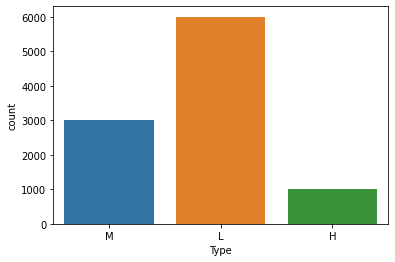

In [ ]:
#visualizing the number of machines falling under High, Medium and Low category

ax = sns.countplot(x="Type", data=df)

In [ ]:
# counting the number of positives and negatives in the target column
df['Machine failure'].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

In [ ]:
df['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [ ]:
#connverting the categorical column 'Type' into dummies 
type_df = pd.get_dummies(df['Type'])
type_df.rename(columns={'H':'High','L':'Low','M':'Medium'},inplace=True)
type_df

High  Low  Medium
0        0    0       1
1        0    1       0
2        0    1       0
3        0    1       0
4        0    1       0
...    ...  ...     ...
9995     0    0       1
9996     1    0       0
9997     0    0       1
9998     1    0       0
9999     0    0       1

[10000 rows x 3 columns]

In [ ]:
df = pd.concat([type_df,df],axis=1,join='inner')
df.drop('Type',axis=1,inplace=True)
df

High  Low  Medium    UDI Product ID  Air temperature  \
0        0    0       1      1     M14860            298.1   
1        0    1       0      2     L47181            298.2   
2        0    1       0      3     L47182            298.1   
3        0    1       0      4     L47183            298.2   
4        0    1       0      5     L47184            298.2   
...    ...  ...     ...    ...        ...              ...   
9995     0    0       1   9996     M24855            298.8   
9996     1    0       0   9997     H39410            298.9   
9997     0    0       1   9998     M24857            299.0   
9998     1    0       0   9999     H39412            299.0   
9999     0    0       1  10000     M24859            299.0   

      Process temperature  Rotational speed  Torque  Tool wear  \
0                   308.6              1551    42.8          0   
1                   308.7              1408    46.3          3   
2                   308.5              1498    49.4          5   
3                   308.6              1433    39.5          7   
4                   308.7              1408    40.0          9   
...                   ...               ...     ...        ...   
9995                308.4              1604    29.5         14   
9996                308.4              1632    31.8         17   
9997                308.6              1645    33.4         22   
9998                308.7              1408    48.5         25   
9999                308.7              1500    40.2         30   

      Machine failure  TWF  HDF  PWF  OSF  RNF  
0                   0    0    0    0    0    0  
1                   0    0    0    0    0    0  
2                   0    0    0    0    0    0  
3                   0    0    0    0    0    0  
4                   0    0    0    0    0    0  
...               ...  ...  ...  ...  ...  ...  
9995                0    0    0    0    0    0  
9996                0    0    0    0    0    0  
9997                0    0    0    0    0    0  
9998                0    0    0    0    0    0  
9999                0    0    0    0    0    0  

[10000 rows x 16 columns]

The Data is clean and ready for splitting and modelling, however we have a class imbalance here with 9661 records with 0 and 339 records with 1. We will therefore apply a class balancing technique to balance the records before modelling and also experiment without it.

In [ ]:
#splitting the data into X and y and then into train and test split
X = df[['High','Low','Medium','Air temperature','Process temperature','Rotational speed','Torque','Tool wear']]
y= df['Machine failure']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Applying different algorithms for modelling and predictions

Applying XGBoost algorithm first with default hyperparameters and then using hyperparameter tuning using 5 fold gridsearch cross validation.

In [ ]:
# classifier with default hyperparameters
xgb_cfl = xgb.XGBClassifier(n_jobs = 1,objective = 'binary:logistic')
xgb_cfl.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
xgb_cfl.fit(X_train,y_train)  # default 
# Get our predictions
xgb_predictions = xgb_cfl.predict(X_test)

In [ ]:
print("The accuracy for the train set is\n", accuracy_score(y_train, xgb_cfl.predict(X_train)))
print('The accuracy for the test set is\n',accuracy_score(y_test,xgb_predictions))
print('The confusion matrix for the test set is\n',confusion_matrix(y_test,xgb_predictions))
print('The classification report for the test set is\n',classification_report(y_test,xgb_predictions))


The accuracy for the train set is
 0.989
The accuracy for the test set is
 0.984
The confusion matrix for the test set is
 [[2899    8]
 [  40   53]]
The classification report for the test set is
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2907
           1       0.87      0.57      0.69        93

    accuracy                           0.98      3000
   macro avg       0.93      0.78      0.84      3000
weighted avg       0.98      0.98      0.98      3000



Now lets tune the hyperparameters for the XGBoost model and use the best one to see if we get better results

In [ ]:
# Create the parameter grid based on the results of random search 
params = {
        'n_estimators' : [100, 200,300], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5

param_comb = 500

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='recall', n_jobs=-1, cv=5, verbose=3, random_state=42)

In [ ]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=500, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.1, 0.5, 1, 1.5, 5],
                                        'learning_rate': [0.01, 0.02, 0.05, 0.1,
                                                          0.25],
                                        'max_depth': [3, 4, 5, 10, 12],
                                        'min_child_weight': [1, 5, 7, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='recall', verbose=3)

In [ ]:
xgb_best= random_search.best_estimator_
print(xgb_best)
xgb_best.fit(X_train,y_train)
xgb_predictions_best = xgb_best.predict(X_test)
print("The accuracy for the train set is\n", accuracy_score(y_train, xgb_best.predict(X_train)))
print('The accuracy for the test set is\n',accuracy_score(y_test,xgb_predictions_best))
print('The confusion matrix for the test set is\n',confusion_matrix(y_test,xgb_predictions_best))
print('The classification report for the test set is\n',classification_report(y_test,xgb_predictions_best))

XGBClassifier(colsample_bytree=1.0, gamma=0.5, learning_rate=0.01, max_depth=10,
              subsample=1.0)
The accuracy for the train set is
 0.9924285714285714
The accuracy for the test set is
 0.983
The confusion matrix for the test set is
 [[2888   19]
 [  32   61]]
The classification report for the test set is
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2907
           1       0.76      0.66      0.71        93

    accuracy                           0.98      3000
   macro avg       0.88      0.82      0.85      3000
weighted avg       0.98      0.98      0.98      3000



Choosing the best estimator we have seen a slight dip in precision but overall improvement in recall and f1-score.

Lets use LightGBM algorithm and repeat the process to see if we can get better results than the ones above.Applying it first with default hyperparameters and then using hyperparameter tuning using 5 fold gridsearch cross validation.

In [ ]:
lgb_classifier = lgb.LGBMClassifier(random_state=100) # default 
lgb_classifier.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 100,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
lgb_classifier.fit(X_train,y_train)
lgb_predictions = lgb_classifier.predict(X_test)
print("The accuracy for the train set is\n", accuracy_score(y_train, lgb_classifier.predict(X_train)))
print('The accuracy for the test set is\n',accuracy_score(y_test,lgb_predictions))
print('The confusion matrix for the test set is\n',confusion_matrix(y_test,lgb_predictions))
print('The classification report for the test set is\n',classification_report(y_test,lgb_predictions))

The accuracy for the train set is
 1.0
The accuracy for the test set is
 0.985
The confusion matrix for the test set is
 [[2899    8]
 [  37   56]]
The classification report for the test set is
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2907
           1       0.88      0.60      0.71        93

    accuracy                           0.98      3000
   macro avg       0.93      0.80      0.85      3000
weighted avg       0.98      0.98      0.98      3000



In [ ]:
# A parameter grid for LightGBM
params = {
        'n_estimators' : [100, 200,300], # no of trees 
        'learning_rate' : [0.05, 0.1, 0.25],  # eta
        'min_child_weight': [0.5,1,2,3],
        'gamma': [0.1, 0.5, 1, 1.5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 10, 12]
        }

folds = 5

param_comb = 500

random_search_lgb = RandomizedSearchCV(lgb_classifier, param_distributions=params, n_iter=param_comb, scoring='recall', n_jobs=-1, cv=5, verbose=3, random_state=42)

In [ ]:
random_search_lgb.fit(X_train,y_train)


Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=100), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.1, 0.5, 1, 1.5],
                                        'learning_rate': [0.05, 0.1, 0.25],
                                        'max_depth': [3, 4, 10, 12],
                                        'min_child_weight': [0.5, 1, 2, 3],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='recall', verbose=3)

In [ ]:
lgb_best = random_search_lgb.best_estimator_
lgb_best.fit(X_train,y_train)
print(lgb_best)
lgb_predictions_best = lgb_best.predict(X_test)
print("The accuracy for the train set is\n", accuracy_score(y_train, lgb_best.predict(X_train)))
print('The accuracy for the test set is\n',accuracy_score(y_test,lgb_predictions_best))
print('The confusion matrix for the test set is\n',confusion_matrix(y_test,lgb_predictions_best))
print('The classification report for the test set is\n',classification_report(y_test,lgb_predictions_best))

LGBMClassifier(gamma=0.1, learning_rate=0.25, max_depth=12,
               min_child_weight=0.5, n_estimators=300, random_state=100)
The accuracy for the train set is
 1.0
The accuracy for the test set is
 0.9866666666666667
The confusion matrix for the test set is
 [[2897   10]
 [  30   63]]
The classification report for the test set is
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2907
           1       0.86      0.68      0.76        93

    accuracy                           0.99      3000
   macro avg       0.93      0.84      0.88      3000
weighted avg       0.99      0.99      0.99      3000



Here after applying the hyperparameter tuning and selecting the best model to predict, we find there is a very slight dip in precision but improvement in recall, f1-score and overall accuracy



---
Lets apply catboost to the data and see if the predictions improve


In [ ]:
df_cat = pd.read_csv('ai4i2020.csv')
# renaming the columns for better analysis
df_cat.rename(columns={'Air temperature [K]':'Air temperature','Process temperature [K]':'Process temperature','Rotational speed [rpm]':'Rotational speed','Torque [Nm]':'Torque','Tool wear [min]':'Tool wear'},inplace=True)

In [ ]:
X_cat = df_cat[['Type','Air temperature','Process temperature','Rotational speed','Torque','Tool wear']]
y_cat= df_cat['Machine failure']

In [ ]:
X_train_cat,X_test_cat,y_train_cat,y_test_cat = train_test_split(X_cat,y_cat,test_size=0.3,random_state=42)

In [ ]:
cat_features = ['Type']

In [ ]:
catb = CatBoostClassifier(cat_features = cat_features)

In [ ]:
catb.fit(X_train_cat,y_train_cat)


Learning rate set to 0.023648
0:	learn: 0.6427025	total: 57.4ms	remaining: 57.4s
1:	learn: 0.5995517	total: 66.3ms	remaining: 33.1s
2:	learn: 0.5591214	total: 77.5ms	remaining: 25.8s
3:	learn: 0.5211904	total: 91.7ms	remaining: 22.8s
4:	learn: 0.4906482	total: 101ms	remaining: 20.2s
5:	learn: 0.4586638	total: 112ms	remaining: 18.6s
6:	learn: 0.4312987	total: 123ms	remaining: 17.5s
7:	learn: 0.4066042	total: 131ms	remaining: 16.2s
8:	learn: 0.3835976	total: 139ms	remaining: 15.3s
9:	learn: 0.3608186	total: 147ms	remaining: 14.5s
10:	learn: 0.3423061	total: 154ms	remaining: 13.8s
11:	learn: 0.3252449	total: 162ms	remaining: 13.3s
12:	learn: 0.3100801	total: 169ms	remaining: 12.8s
13:	learn: 0.2924524	total: 177ms	remaining: 12.4s
14:	learn: 0.2784496	total: 185ms	remaining: 12.1s
15:	learn: 0.2640428	total: 196ms	remaining: 12s
16:	learn: 0.2508552	total: 206ms	remaining: 11.9s
17:	learn: 0.2367869	total: 216ms	remaining: 11.8s
18:	learn: 0.2241531	total: 224ms	remaining: 11.6s
19:	learn

In [ ]:
catb_predictions = catb.predict(X_test_cat)
print("The accuracy for the train set is\n", accuracy_score(y_train_cat, catb.predict(X_train_cat)))
print('The accuracy for the test set is\n',accuracy_score(y_test_cat,catb_predictions))
print('The confusion matrix for the test set is\n',confusion_matrix(y_test_cat,catb_predictions))
print('The classification report for the test set is\n',classification_report(y_test_cat,catb_predictions))

The accuracy for the train set is
 0.9965714285714286
The accuracy for the test set is
 0.9863333333333333
The confusion matrix for the test set is
 [[2899    8]
 [  33   60]]
The classification report for the test set is
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2907
           1       0.88      0.65      0.75        93

    accuracy                           0.99      3000
   macro avg       0.94      0.82      0.87      3000
weighted avg       0.99      0.99      0.99      3000



We've got pretty good results with Catboost having default hyperparameters, lets tune them to get better results.

In [ ]:
params = {
    
    'max_depth':[7,9,10],
    'learning_rate':[0.01,0.05,0.1],
    'n_estimators': [200,300,500]
}

In [ ]:
grid_search_catb = GridSearchCV(estimator=catb,param_grid = params,n_jobs=1,cv=5,scoring='recall',error_score=0)
grid_search_catb.fit(X_train_cat,y_train_cat)

Streaming output truncated to the last 5000 lines.
100:	learn: 0.0142516	total: 1.78s	remaining: 1.74s
101:	learn: 0.0141485	total: 1.8s	remaining: 1.73s
102:	learn: 0.0140085	total: 1.82s	remaining: 1.72s
103:	learn: 0.0138731	total: 1.84s	remaining: 1.7s
104:	learn: 0.0136922	total: 1.86s	remaining: 1.69s
105:	learn: 0.0135231	total: 1.88s	remaining: 1.67s
106:	learn: 0.0133250	total: 1.9s	remaining: 1.65s
107:	learn: 0.0131401	total: 1.92s	remaining: 1.64s
108:	learn: 0.0128882	total: 1.94s	remaining: 1.62s
109:	learn: 0.0127460	total: 1.96s	remaining: 1.6s
110:	learn: 0.0126588	total: 1.98s	remaining: 1.58s
111:	learn: 0.0125875	total: 1.99s	remaining: 1.57s
112:	learn: 0.0124335	total: 2.02s	remaining: 1.56s
113:	learn: 0.0123546	total: 2.04s	remaining: 1.54s
114:	learn: 0.0122365	total: 2.07s	remaining: 1.53s
115:	learn: 0.0120916	total: 2.09s	remaining: 1.51s
116:	learn: 0.0119501	total: 2.11s	remaining: 1.49s
117:	learn: 0.0117968	total: 2.13s	remaining: 1.48s
118:	learn: 0.011

GridSearchCV(cv=5, error_score=0,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f01000fab10>,
             n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [7, 9, 10],
                         'n_estimators': [200, 300, 500]},
             scoring='recall')

In [ ]:
catb_best =grid_search_catb.best_estimator_
print(catb_best.get_params())

{'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 500, 'cat_features': ['Type']}


In [ ]:

catb_best.fit(X_train_cat,y_train_cat)
catb_best_predictions = catb_best.predict(X_test_cat)
print("The accuracy for the train set is\n", accuracy_score(y_train_cat, catb_best.predict(X_train_cat)))
print('The accuracy for the test set is\n',accuracy_score(y_test_cat,catb_best_predictions))
print('The confusion matrix for the test set is\n',confusion_matrix(y_test_cat,catb_best_predictions))
print('The classification report for the test set is\n',classification_report(y_test_cat,catb_best_predictions))

0:	learn: 0.5814354	total: 21.7ms	remaining: 10.8s
1:	learn: 0.5111953	total: 44.3ms	remaining: 11s
2:	learn: 0.4604761	total: 49.2ms	remaining: 8.14s
3:	learn: 0.4177604	total: 53.6ms	remaining: 6.64s
4:	learn: 0.3780111	total: 58.4ms	remaining: 5.78s
5:	learn: 0.3169882	total: 79.7ms	remaining: 6.56s
6:	learn: 0.2912391	total: 84.7ms	remaining: 5.97s
7:	learn: 0.2521542	total: 105ms	remaining: 6.44s
8:	learn: 0.2254185	total: 126ms	remaining: 6.86s
9:	learn: 0.2061911	total: 133ms	remaining: 6.5s
10:	learn: 0.1959009	total: 137ms	remaining: 6.09s
11:	learn: 0.1742209	total: 157ms	remaining: 6.4s
12:	learn: 0.1658093	total: 163ms	remaining: 6.1s
13:	learn: 0.1499311	total: 183ms	remaining: 6.34s
14:	learn: 0.1435902	total: 200ms	remaining: 6.46s
15:	learn: 0.1305895	total: 220ms	remaining: 6.65s
16:	learn: 0.1249743	total: 228ms	remaining: 6.47s
17:	learn: 0.1151302	total: 259ms	remaining: 6.92s
18:	learn: 0.1070234	total: 292ms	remaining: 7.4s
19:	learn: 0.1036312	total: 300ms	remain



---
Since there is an imbalance in the data, let us go ahead with applying RUS boost which Randomly undersamples the data and then goes ahead with the training of the model. Let us see what kind of results we get with this algorithm.


In [ ]:
rusb = RUSBoostClassifier()
rusb.fit(X_train,y_train)
rusb_predictions = rusb.predict(X_test)
print("The accuracy for the train set is\n", accuracy_score(y_train, rusb.predict(X_train)))
print('The accuracy for the test set is\n',accuracy_score(y_test,rusb_predictions))
print('The confusion matrix for the test set is\n',confusion_matrix(y_test,rusb_predictions))
print('The classification report for the test set is\n',classification_report(y_test,rusb_predictions))

The accuracy for the train set is
 0.8304285714285714
The accuracy for the test set is
 0.8143333333333334
The confusion matrix for the test set is
 [[2383  524]
 [  33   60]]
The classification report for the test set is
               precision    recall  f1-score   support

           0       0.99      0.82      0.90      2907
           1       0.10      0.65      0.18        93

    accuracy                           0.81      3000
   macro avg       0.54      0.73      0.54      3000
weighted avg       0.96      0.81      0.87      3000



The results with the default hyperparameters are pathetic, hence we need to tune them to get better results.

In [ ]:
params = {
    'learning_rate':[0.005,0.008,0.01,0.02,0.1,0.2],
    'n_estimators':[200,300,320,350],
    'algorithm':['SAMME', 'SAMME.R']
    }
grid_search_rus = GridSearchCV(estimator=rusb,param_grid = params,n_jobs=1,cv=5,scoring='roc_auc',error_score=0)
grid_search_rus.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=0, estimator=RUSBoostClassifier(), n_jobs=1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.005, 0.008, 0.01, 0.02, 0.1, 0.2],
                         'n_estimators': [200, 300, 320, 350]},
             scoring='roc_auc')

In [ ]:
rusb_best = grid_search_rus.best_estimator_
print(rusb_best)
rusb_best.fit(X_train,y_train)
rusb_best_predictions = rusb_best.predict(X_test)
print("The accuracy for the train set is\n", accuracy_score(y_train, rusb_best.predict(X_train)))
print('The accuracy for the test set is\n',accuracy_score(y_test,rusb_best_predictions))
print('The confusion matrix for the test set is\n',confusion_matrix(y_test,rusb_best_predictions))
print('The classification report for the test set is\n',classification_report(y_test,rusb_best_predictions))

RUSBoostClassifier(learning_rate=0.02, n_estimators=350)
The accuracy for the train set is
 0.9062857142857143
The accuracy for the test set is
 0.908
The confusion matrix for the test set is
 [[2639  268]
 [   8   85]]
The classification report for the test set is
               precision    recall  f1-score   support

           0       1.00      0.91      0.95      2907
           1       0.24      0.91      0.38        93

    accuracy                           0.91      3000
   macro avg       0.62      0.91      0.67      3000
weighted avg       0.97      0.91      0.93      3000



the RUS boost is giving us the best recall when compared to the other models. And in our problem we need a high recall since we would need to see out of all failures predicted, how many were correct since we dont need fake failures to be predicted and issues arising.



---

Lets apply SMOTE Boost to the train data and see how it performs when the data is oversampled.

In [ ]:
smb = SMOTEBoostClassifier()
smb.fit(X_train,y_train)

smb_predictions = smb.predict(X_test)
print("The accuracy for the train set is\n", accuracy_score(y_train, smb.predict(X_train)))
print('The accuracy for the test set is\n',accuracy_score(y_test,smb_predictions))
print('The confusion matrix for the test set is\n',confusion_matrix(y_test,smb_predictions))
print('The classification report for the test set is\n',classification_report(y_test,smb_predictions))


The accuracy for the train set is
 0.937
The accuracy for the test set is
 0.9316666666666666
The confusion matrix for the test set is
 [[2723  184]
 [  21   72]]
The classification report for the test set is
               precision    recall  f1-score   support

           0       0.99      0.94      0.96      2907
           1       0.28      0.77      0.41        93

    accuracy                           0.93      3000
   macro avg       0.64      0.86      0.69      3000
weighted avg       0.97      0.93      0.95      3000



In [ ]:
params = {
    'learning_rate':[0.01,0.02,0.1,0.2,0.3],
    'n_estimators':[20,50,100,200],
    'algorithm':['SAMME', 'SAMME.R']
    }
grid_search_smb = GridSearchCV(estimator=smb,param_grid = params,n_jobs=1,cv=5,scoring='recall',error_score=0)
grid_search_smb.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=0, estimator=SMOTEBoostClassifier(), n_jobs=1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.02, 0.1, 0.2, 0.3],
                         'n_estimators': [20, 50, 100, 200]},
             scoring='recall')

In [ ]:
smb_best = grid_search_smb.best_estimator_
smb_best.fit(X_train,y_train)
smb__best_predictions = smb_best.predict(X_test)
print("The accuracy for the train set is\n", accuracy_score(y_train, smb_best.predict(X_train)))
print('The accuracy for the test set is\n',accuracy_score(y_test,smb__best_predictions))
print('The confusion matrix for the test set is\n',confusion_matrix(y_test,smb__best_predictions))
print('The classification report for the test set is\n',classification_report(y_test,smb__best_predictions))

The accuracy for the train set is
 0.8658571428571429
The accuracy for the test set is
 0.853
The confusion matrix for the test set is
 [[2483  424]
 [  17   76]]
The classification report for the test set is
               precision    recall  f1-score   support

           0       0.99      0.85      0.92      2907
           1       0.15      0.82      0.26        93

    accuracy                           0.85      3000
   macro avg       0.57      0.84      0.59      3000
weighted avg       0.97      0.85      0.90      3000



Seems like the class imbalance technique is working well to improve our shot at predicting the right failures 
Hence lets try applying SMOTE and Random Oversampling techniques to our dataset and then apply the above models over it to see if we get better recall scores.

In [ ]:

sm=SMOTE(random_state=12)
X_train_res,y_train_res = sm.fit_resample(X_train,y_train)

Now lets apply the best XGBoost model over the resampled dataset

In [ ]:
xgb_best.fit(X_train_res,y_train_res)
xgb_predictions_best = xgb_best.predict(X_test)
print("The accuracy for the train set is\n", accuracy_score(y_train_res, xgb_best.predict(X_train_res)))
print('The accuracy for the test set is\n',accuracy_score(y_test,xgb_predictions_best))
print('The confusion matrix for the test set is\n',confusion_matrix(y_test,xgb_predictions_best))
print('The classification report for the test set is\n',classification_report(y_test,xgb_predictions_best))

The accuracy for the train set is
 0.9819366301450992
The accuracy for the test set is
 0.951
The confusion matrix for the test set is
 [[2788  119]
 [  28   65]]
The classification report for the test set is
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      2907
           1       0.35      0.70      0.47        93

    accuracy                           0.95      3000
   macro avg       0.67      0.83      0.72      3000
weighted avg       0.97      0.95      0.96      3000



Now let's apply the LightGBM boost over the resampled data to see the results

In [ ]:
lgb_best.fit(X_train_res,y_train_res)
lgb_predictions_best = lgb_best.predict(X_test)
print("The accuracy for the train set is\n", accuracy_score(y_train_res, lgb_best.predict(X_train_res)))
print('The accuracy for the test set is\n',accuracy_score(y_test,lgb_predictions_best))
print('The confusion matrix for the test set is\n',confusion_matrix(y_test,lgb_predictions_best))
print('The classification report for the test set is\n',classification_report(y_test,lgb_predictions_best))

The accuracy for the train set is
 1.0
The accuracy for the test set is
 0.9806666666666667
The confusion matrix for the test set is
 [[2873   34]
 [  24   69]]
The classification report for the test set is
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2907
           1       0.67      0.74      0.70        93

    accuracy                           0.98      3000
   macro avg       0.83      0.87      0.85      3000
weighted avg       0.98      0.98      0.98      3000



Since SMOTE doesnt support categorical data, we cannot apply it for the training data used for catboost.



---
Lets now also apply Random oversampling to the data and feed it into the algorithms above to see any improvements in the results.


In [ ]:
randos= RandomOverSampler()
X_train_randos,y_train_randos = randos.fit_resample(X_train,y_train)

Now lets apply the best XGBoost model over the Randomly oversampled dataset

In [ ]:
xgb_best.fit(X_train_randos,y_train_randos)
xgb_predictions_best = xgb_best.predict(X_test)
print("The accuracy for the train set is\n", accuracy_score(y_train_randos, xgb_best.predict(X_train_randos)))
print('The accuracy for the test set is\n',accuracy_score(y_test,xgb_predictions_best))
print('The confusion matrix for the test set is\n',confusion_matrix(y_test,xgb_predictions_best))
print('The classification report for the test set is\n',classification_report(y_test,xgb_predictions_best))

The accuracy for the train set is
 0.991042345276873
The accuracy for the test set is
 0.9666666666666667
The confusion matrix for the test set is
 [[2834   73]
 [  27   66]]
The classification report for the test set is
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      2907
           1       0.47      0.71      0.57        93

    accuracy                           0.97      3000
   macro avg       0.73      0.84      0.78      3000
weighted avg       0.97      0.97      0.97      3000



Now lets apply the best LightGBM model over the Randomly oversampled dataset

In [ ]:
lgb_best.fit(X_train_randos,y_train_randos)
lgb_predictions_best = lgb_best.predict(X_test,random_state=42)
print("The accuracy for the train set is\n", accuracy_score(y_train_randos, lgb_best.predict(X_train_randos)))
print('The accuracy for the test set is\n',accuracy_score(y_test,lgb_predictions_best))
print('The confusion matrix for the test set is\n',confusion_matrix(y_test,lgb_predictions_best))
print('The classification report for the test set is\n',classification_report(y_test,lgb_predictions_best))

The accuracy for the train set is
 1.0
The accuracy for the test set is
 0.9886666666666667
The confusion matrix for the test set is
 [[2897   10]
 [  24   69]]
The classification report for the test set is
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2907
           1       0.87      0.74      0.80        93

    accuracy                           0.99      3000
   macro avg       0.93      0.87      0.90      3000
weighted avg       0.99      0.99      0.99      3000



Now lets apply Random oversampling to the categorical training data and apply catboost on it to see the changes in the results.

In [ ]:
X_train_cat_randos,y_train_cat_randos = randos.fit_resample(X_train_cat,y_train_cat)

In [ ]:
catb_best.fit(X_train_cat_randos,y_train_cat_randos)
catb_best_predictions_randos = catb.predict(X_test_cat)
print("The accuracy for the train set is\n", accuracy_score(y_train_cat_randos, catb_best.predict(X_train_cat_randos)))
print('The accuracy for the test set is\n',accuracy_score(y_test,catb_best_predictions_randos))
print('The confusion matrix for the test set is\n',confusion_matrix(y_test,catb_best_predictions_randos))
print('The classification report for the test set is\n',classification_report(y_test,catb_best_predictions_randos))

0:	learn: 0.6158387	total: 242ms	remaining: 2m
1:	learn: 0.5572624	total: 394ms	remaining: 1m 38s
2:	learn: 0.5048516	total: 524ms	remaining: 1m 26s
3:	learn: 0.4519318	total: 578ms	remaining: 1m 11s
4:	learn: 0.4089059	total: 632ms	remaining: 1m 2s
5:	learn: 0.3738276	total: 686ms	remaining: 56.5s
6:	learn: 0.3446687	total: 758ms	remaining: 53.4s
7:	learn: 0.3186880	total: 818ms	remaining: 50.3s
8:	learn: 0.2950070	total: 871ms	remaining: 47.5s
9:	learn: 0.2749618	total: 925ms	remaining: 45.3s
10:	learn: 0.2575952	total: 983ms	remaining: 43.7s
11:	learn: 0.2387086	total: 1.04s	remaining: 42.3s
12:	learn: 0.2260748	total: 1.09s	remaining: 41s
13:	learn: 0.2133055	total: 1.15s	remaining: 39.8s
14:	learn: 0.2015522	total: 1.21s	remaining: 39s
15:	learn: 0.1934169	total: 1.26s	remaining: 38s
16:	learn: 0.1836216	total: 1.31s	remaining: 37.2s
17:	learn: 0.1767052	total: 1.36s	remaining: 36.4s
18:	learn: 0.1685975	total: 1.42s	remaining: 35.9s
19:	learn: 0.1620378	total: 1.47s	remaining: 35

The best overall result is given by LightGBM with Random oversampling who's results are shown in the screenshot below. so lets go ahead with its predictions to feed into the Explainable AI model to find the mode of failure.

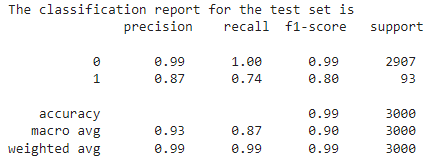

In [ ]:
#Using the predictions from the LightGBM with Random oversampling
lgb_predictions_best = pd.Series(lgb_predictions_best)
lgb_predictions_best

0       0
1       0
2       0
3       0
4       0
       ..
2995    0
2996    0
2997    0
2998    0
2999    0
Length: 3000, dtype: int64

In [ ]:
#to check the failure instances according to the predictions

Failure_instances = lgb_predictions_best.index[lgb_predictions_best == 1].tolist()
print(Failure_instances)
print(len(Failure_instances))

[95, 113, 119, 121, 124, 127, 201, 202, 326, 331, 342, 368, 395, 429, 483, 518, 553, 559, 565, 566, 662, 727, 748, 769, 794, 823, 902, 916, 944, 1002, 1043, 1106, 1109, 1131, 1134, 1144, 1152, 1167, 1182, 1188, 1397, 1438, 1533, 1534, 1537, 1600, 1637, 1708, 1737, 1910, 1998, 2011, 2042, 2214, 2233, 2288, 2357, 2391, 2440, 2494, 2495, 2592, 2614, 2701, 2702, 2704, 2743, 2765, 2804, 2853, 2858, 2870, 2874, 2889, 2924, 2933, 2949, 2982, 2989]
79


## Checking if the predictions are correctly showing up the mode of failure using SHAP by plotting all the failure instances one by one to see which factor is responsible for the failure.

In [ ]:
import shap
def shap_calculator(df,start_index,end_index):
  explainer = shap.TreeExplainer(lgb_best)
  shap_values = explainer.shap_values(df[start_index:end_index])
  shap.initjs()
  return shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], df.iloc[start_index:end_index])



---



---


To check randomly if the shap values explainer is performing well on predicting the mode of failure for the failure instances according to the previous paper worked upon with LIME. Lets use the same random points used in the previous papers.

In [ ]:
TWF_df = df.iloc[[2671,3865,6340,8357,9018]]
TWF_df

High  Low  Medium   UDI Product ID  Air temperature  \
2671     0    0       1  2672     M17531            299.7   
3865     1    0       0  3866     H33279            302.6   
6340     1    0       0  6341     H35754            300.5   
8357     0    1       0  8358     L55537            298.5   
9018     0    1       0  9019     L56198            297.3   

      Process temperature  Rotational speed  Torque  Tool wear  \
2671                309.3              1399    41.9        221   
3865                311.5              1629    34.4        228   
6340                309.9              1397    45.9        210   
8357                309.5              1385    46.3        203   
9018                308.1              1615    35.4        217   

      Machine failure  TWF  HDF  PWF  OSF  RNF  
2671                1    1    0    0    0    0  
3865                1    1    0    0    0    0  
6340                1    1    0    0    0    0  
8357                1    1    0    0    0    0  
9018                1    1    0    0    0    0

In [ ]:
HDF_df = df.iloc[[3236,4078,4173,4326,4501]]
HDF_df

High  Low  Medium   UDI Product ID  Air temperature  \
3236     0    0       1  3237     M18096            300.8   
4078     1    0       0  4079     H33492            302.1   
4173     0    0       1  4174     M19033            302.2   
4326     0    1       0  4327     L51506            301.6   
4501     0    1       0  4502     L51681            302.5   

      Process temperature  Rotational speed  Torque  Tool wear  \
3236                309.4              1342    62.4        113   
4078                310.7              1294    62.4        101   
4173                310.6              1346    49.2        134   
4326                310.1              1362    55.8         70   
4501                310.2              1307    54.0         86   

      Machine failure  TWF  HDF  PWF  OSF  RNF  
3236                1    0    1    0    0    0  
4078                1    0    1    0    0    0  
4173                1    0    1    0    0    0  
4326                1    0    1    0    0    0  
4501                1    0    1    0    0    0

In [ ]:
PWF_df = df.iloc[[463,1492,3000,7536,8582]]
PWF_df

High  Low  Medium   UDI Product ID  Air temperature  \
463      0    1       0   464     L47643            297.4   
1492     0    0       1  1493     M16352            298.0   
3000     1    0       0  3001     H32414            300.5   
7536     0    1       0  7537     L54716            300.1   
8582     0    0       1  8583     M23442            297.5   

      Process temperature  Rotational speed  Torque  Tool wear  \
463                 308.7              2874     4.2        118   
1492                308.7              1479    58.5        176   
3000                309.8              1324    72.8        159   
7536                311.3              2579    12.5         64   
8582                308.1              1334    72.0        151   

      Machine failure  TWF  HDF  PWF  OSF  RNF  
463                 1    0    0    1    0    0  
1492                1    0    0    1    0    0  
3000                1    0    0    1    0    0  
7536                1    0    0    1    0    0  
8582                1    0    0    1    0    0

In [ ]:
OSF_df = df.iloc[[249,3019,5399,7591,9659]]
OSF_df


High  Low  Medium   UDI Product ID  Air temperature  \
249      0    1       0   250     L47429            298.0   
3019     0    1       0  3020     L50199            300.5   
5399     1    0       0  5400     H34813            302.8   
7591     0    0       1  7592     M22451            300.5   
9659     0    1       0  9660     L56839            298.9   

      Process temperature  Rotational speed  Torque  Tool wear  \
249                 308.3              1405    56.2        218   
3019                309.8              1379    54.2        207   
5399                312.4              1411    53.8        246   
7591                311.1              1296    61.3        202   
9659                309.8              1287    61.9        216   

      Machine failure  TWF  HDF  PWF  OSF  RNF  
249                 1    0    0    0    1    0  
3019                1    0    0    0    1    0  
5399                1    0    0    0    1    0  
7591                1    0    0    0    1    0  
9659                1    0    0    0    1    0

In [ ]:
#getting the X variables for the dataframes
TWF_df_X = TWF_df[['High', 'Low', 'Medium', 'Air temperature', 'Process temperature',
       'Rotational speed', 'Torque', 'Tool wear']]
HDF_df_X = HDF_df[['High', 'Low', 'Medium', 'Air temperature', 'Process temperature',
       'Rotational speed', 'Torque', 'Tool wear']]
PWF_df_X = PWF_df[['High', 'Low', 'Medium', 'Air temperature', 'Process temperature',
       'Rotational speed', 'Torque', 'Tool wear']]
OSF_df_X = OSF_df[['High', 'Low', 'Medium', 'Air temperature', 'Process temperature',
       'Rotational speed', 'Torque', 'Tool wear']]

Lets check for the Tool wear failure points and see if we get good results.

In [ ]:
shap_calculator(TWF_df_X,0,1)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [ ]:
shap_calculator(TWF_df_X,1,2)
  

In [ ]:
shap_calculator(TWF_df_X,2,3)
  

In [ ]:
shap_calculator(TWF_df_X,3,4)

In [ ]:
shap_calculator(TWF_df_X,4,5)

Lets check for Heat Dissipation failure and see if we get better results.

In [ ]:
shap_calculator(HDF_df_X,0,1)

In [ ]:
shap_calculator(HDF_df_X,1,2)

In [ ]:
shap_calculator(HDF_df_X,2,3)

In [ ]:
shap_calculator(HDF_df_X,3,4)

In [ ]:
shap_calculator(HDF_df_X,4,5)

Lets check for the Power failure now and see if we get good results.

In [ ]:
shap_calculator(PWF_df_X,0,1)

In [ ]:
shap_calculator(PWF_df_X,1,2)

In [ ]:
shap_calculator(PWF_df_X,2,3)

In [ ]:
shap_calculator(PWF_df_X,3,4)

In [ ]:
shap_calculator(PWF_df_X,4,5)

Lets see for OSF now

In [ ]:
shap_calculator(OSF_df_X,0,1)

In [ ]:
shap_calculator(OSF_df_X,1,2)

In [ ]:
shap_calculator(OSF_df_X,2,3)

In [ ]:
shap_calculator(OSF_df_X,3,4)

In [ ]:
shap_calculator(OSF_df_X,4,5)